# Statistics Module 2

In this module will will explore non-linear least squares regression and goodness-of-fit analysis.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tests

## Q1: black-body radiation

Black-body radiation is the idealized emission spectrum of an object with thermal energy. In other words, it describes the color and intensity of light emitted by a hot object.

The thin filament of an incandescent light bulb emit black-body radiation when we provide a current. The temperature of the filament ranges from 2700-3000 K ("soft"), 3500–4100 K ("cool"), to 5000-6000 K ("daylight"). The black-body spectrum is given by:

$$B_\lambda = \frac{2hc^2}{\lambda^5 \left[\exp{\left(\frac{hc}{\lambda K_B T}\right)} - 1\right]}$$
 
where $h$ is the Planck constant, $K_B$ is the Boltzmann constant, $\lambda$ is the wavelength of light, and $T$ is the temperature in Kelvin. $B_\lambda$ is the specific intensity: the power *per* area $\times$ solid angle $\times$ wavelength [W/m$^3$Sr]. In other words, $B_\lambda$ is the specific flux (the "power" radiated) at a given wavelength of light.

Suppose your company, ULAB Incandescent Industries LLC, has just developed a new incandescent bulb and you are tasked to characterize this creation. The company's staff scientist has already measured the black-body spectrum as a function of wavelength of the bulb. Your task is to analyze this data!

### Q1a: the spectrum

The data for the black-body spectrum is located at [https://www.ocf.berkeley.edu/~yizhu/bb.txt](https://www.ocf.berkeley.edu/~yizhu/bb.txt). Using Pandas, download this data and make a plot of specific intensity as a function of wavelength in nm. Make sure to label axis and attach an appropriate title.

Hints:
- ``pandas.read_csv`` can read data from internet sources, you don't have to download the file to your computer!
- Pay close attention to units!

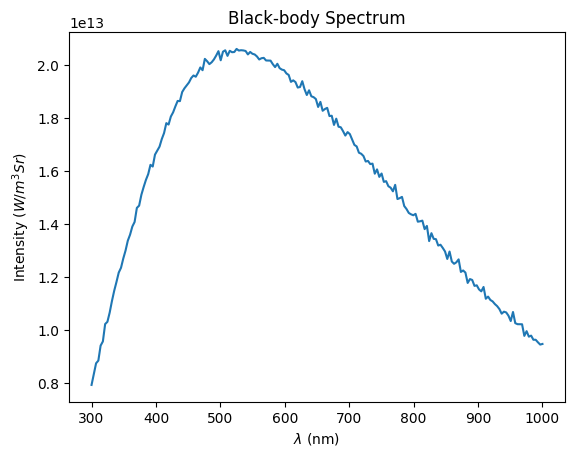

In [2]:
data = pd.read_csv('https://www.ocf.berkeley.edu/~yizhu/bb.txt', delimiter=',')

lam = data['Lambda (nm)']
I = data['Specific Intensity (W/m^3*Sr)']

fig, ax = plt.subplots()
ax.plot(lam, I)
ax.set_xlabel(r'$\lambda$ (nm)')
ax.set_ylabel(r'Intensity ($W/m^3 Sr$)')
ax.set_title('Black-body Spectrum')
plt.show()

### Q1b: the black-body model

In order to the fit our data to the black-body spectrum, we will use ``scipy.optimize.curve_fit``. First, we must define in python the function we want to fit our data to.

Implement the function ``bb``, which takes in the parameters ``lam``, ``T``, ``a``, and ``b``. ``lam`` is the independent variable and the remaining parameters are the fit parameters. Read the docstring below to understand what each parameter means (take note of the units!). 

Make sure your function is compatible with numpy arrays! Use the model,

$$B_\lambda = a\left[\frac{2hc^2}{\lambda^5 \left[\exp{\left(\frac{hc}{\lambda K_B T}\right)} - 1\right]}\right] + b$$

In [3]:
h = 6.626e-34 #Js
c = 3e8 #m/s
kb = 1.38e-23 #J/K

def bb(lam, T, a, b):
    '''
    Black-body specture B_lambda

    Paramters:
        lam: wavelength in meters
        T: temperature in kelvin
        a: scaling factor (dimensionless)
        b: offset (dimensionless)
    '''
    return a*2*h*c**2 / (lam**5 * (np.exp(h*c/(lam*kb*T))-1)) + b

In [4]:
tests.run('test_1b', bb)

**<span style="color: green;">Passed // 2022-03-14 17:14:37.872675</span>**

### Q1c: curve fitting

Using ``scipy.optimize.curve_fit``, determine the optimal least-square regression of the black-body spectrum. What is your best guess for the temperature of the filament ``T_fit``? Read the documentation [Here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

**Hint 1**:

- `` f:`` the fitting function. This is the function that produces the model.

- ``xdata:`` the independent data. 

- ``ydata:`` the dependent data. ``curve_fit`` assumes f(xdata, \*params) = ydata + errors. (*params just means any number of paramters.)

- ``p0:`` (optional) initial guesses for parameters.

What does curve_fit return? Check the documentation! You **have** to consult the documentation in order to know how to use the returned arrays and extract the best fit parameters and errors associated.

**Hint 2**: if you're encountering strange overflow errors or a terrible fit, you should give the curve fitting function some initial parameters. Read up on the ``p0`` parameter. The value of ``p0`` isn't too important, so ~1000 K will do! What would be reasonable guesses for ``a`` and ``b``?

In [5]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(bb, lam*1e-9, I, p0=[1000,1,0])

T_fit = popt[0]
print(f'Best fit temperature {T_fit:.0f} K')

Best fit temperature 5499 K


/Users/yizhu/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [6]:
tests.run('test_1c', T_fit)

**<span style="color: green;">Passed // 2022-03-14 17:14:40.346271</span>**

### Q1d: blub type

What type of bulb does this temperature correspond to: soft, cool, or daylight? Type your answer here.

### Q1e: plotting

Replicate your plot from Q1a here. Then, on the same figure, plot the best fit curve you found above. **Be sure to label the axes, label each plot, and show a legend.**

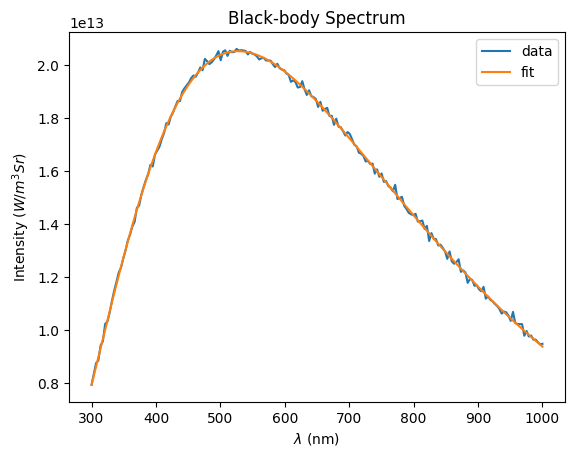

In [7]:
fit = bb(lam*1e-9, *popt)

fig, ax = plt.subplots()
ax.plot(lam, I, label='data')
ax.plot(lam, fit, label='fit')
ax.set_xlabel(r'$\lambda$ (nm)')
ax.set_ylabel(r'Intensity ($W/m^3 Sr$)')
ax.set_title('Black-body Spectrum')
ax.legend()
plt.show()

### Q1f: peak wavelength

Estimate the peak wavelength ``peak`` of your best fit curve (not the original data!) **in nm**. What color does this wavelength correspond? Type your answer here.

Hint: numpy has a function that can find the index of a maximum element.

In [8]:
peak = lam[np.argmax(np.array(fit))]
print(f'The peak wavelength is {peak:.0f} nm')

The peak wavelength is 529 nm


In [9]:
tests.run('test_1f', peak)

**<span style="color: green;">Passed // 2022-03-14 17:14:40.932977</span>**

### Q1g: a green sun?

You should have found in Q1f that the color of the sun peaks at the color green. Why doesn't the sun look green to us? In fact, when we look at the night sky, why don't we see any green stars? Type your best guess below.

## Submission

Check to make sure that you have answered all questions. Run all the cells so that all output is visible. Finally, export this notebook as a PDF (File/Download As/PDF via LaTeX (.pdf)) and submit to bCourses.

Created and edited by the ULAB staff. Last updated: March 2021.